In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# loading data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

#data cleanup

Scatter plots are very useful in showing correlations between multiple varaibles. In this specfic section, we will be analysing how the median salary of a given skill and job demand for that particular skill correlate to each other. 

Example data:

In [4]:
data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [38, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

example_df = pd.DataFrame(data)
example_df

,job_skills,skill_count,skill_pay
0,python,38,100
1,sql,25,90
2,java,20,80
3,c++,15,70
4,c#,10,60
5,javascript,5,50
6,html,4,40
7,css,3,30
8,php,2,20
9,ruby,1,10


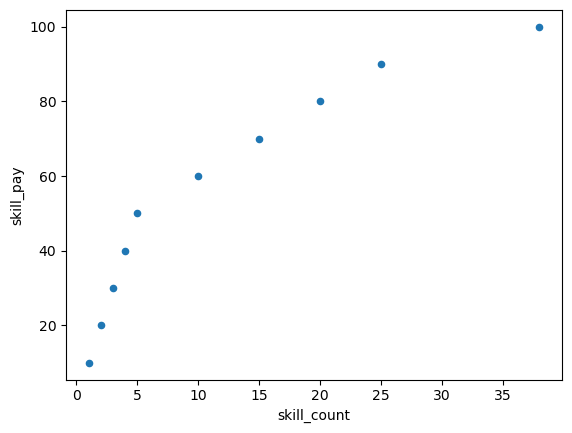

In [6]:
example_df.plot(kind='scatter', x='skill_count', y='skill_pay')
plt.show()

## Analysing the median salary and job demand for a given skill in Data Analyst roles

Here, we want to end up with a dataframe where the list of skills is listed on separate rows on the left, with columns skill count and median salary

In [9]:
df = df[df['job_title_short'] == 'Data Analyst']
df.head(6)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None


In [10]:
df_explode = df.explode('job_skills')
df_explode
# we explode the job_skills column so we are able to group by each individual skill and
# count its occurences across all DA jobs. Now we use the groupby function

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [12]:
skill_stats = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'), 
    median_salary = ('salary_year_avg', 'median') 
)

skill_stats
# here, skill_count and median_salary are new column titles. Following the = sign, we name 
# the existing column we want to carry out the operation on, followed by the agg function itself


,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [16]:
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


<Axes: xlabel='skill_count', ylabel='median_salary'>

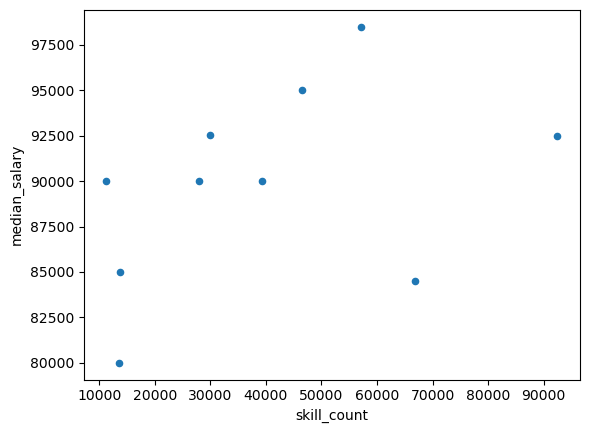

In [17]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')  

Note that in the graph above, there are no labels assigned to each point on the plot and there is no easy way to do this on matplotlib (much easier to do on the seaborn library). 

To fix this, we need to run a for loop that assigns the appropriate label to each point by mapping it to its respective coordinates paired with the plt.text() function.

This contains parameters: 'x, y, s' which specifies the x coordiante, the y coordinate and the string of text

In [24]:
for i, txt in enumerate(skill_stats.index):
    print(i, txt)

plt.show()

# here, we enumerate through the index of the skill_stats dataframe so we only get the label
# of each skill. We can use this to assign the appropriate coordinates and label using the 
# plt.text() function

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap


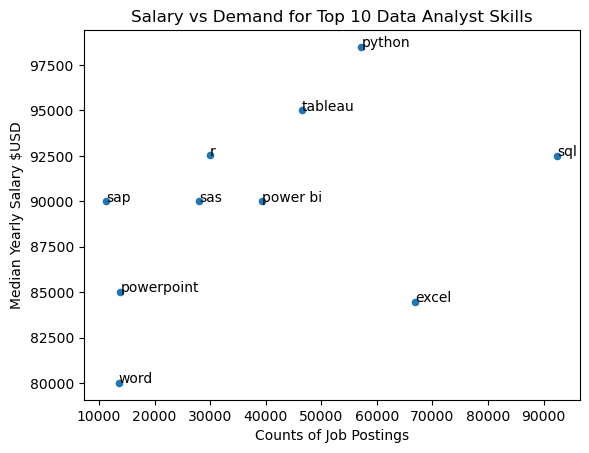

In [31]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')  
plt.xlabel('Counts of Job Postings')
plt.ylabel('Median Yearly Salary $USD')
plt.title('Salary vs Demand for Top 10 Data Analyst Skills')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].loc[txt], skill_stats['median_salary'].loc[txt], txt)

plt.show()

# when defining the plt.text function, we specify the x axis then the y axis coordinates
# by referring to the corresponding columns and rows. Note that here, we use the loc method
# and pass the txt varaible because this is a label-based method. If we were to use the 
# iloc method, it would be the variable i. So it goes to the first row, SQL, finds its coordinate
# and labels it as 'SQL'

Now, the graph is fully labelled with its corresponding values. From the visualisation, we can see that:

- Python, tableau, SQL are high quality skills that both pay well and are in demand